# Data Pre Processing 

In [92]:
import pandas as pd
import numpy as np

In [93]:
#read data from data sets 
data1 = pd.read_csv("DataSets/col_mat_nuw_output.csv",header = None)
data2 = pd.read_csv("DataSets/kan_output.csv", header=None)
data3 = pd.read_csv("DataSets/mon_kur_jaf_output.csv", header=None)
#combine all the read data sets
data = pd.concat([data1,data2,data3])
data.shape

(12782, 4)

In [94]:
#add column names into the data set
data.columns = ["HCHO reading", "Location", "Current Date", "Next Date"]
data

,HCHO reading,Location,Current Date,Next Date
0,0.000197,Colombo Proper,2019-01-01,2019-01-02
1,0.000263,Colombo Proper,2019-01-02,2019-01-03
2,0.000099,Colombo Proper,2019-01-03,2019-01-04
3,0.000210,Colombo Proper,2019-01-04,2019-01-05
4,0.000179,Colombo Proper,2019-01-05,2019-01-06
...,...,...,...,...
5473,NaN,Jaffna Proper,2023-12-27,2023-12-28
5474,0.000051,Jaffna Proper,2023-12-28,2023-12-29
5475,0.000127,Jaffna Proper,2023-12-29,2023-12-30
5476,0.000117,Jaffna Proper,2023-12-30,2023-12-31


In [95]:
#check unique values in the data set 
for column in data:
    print(column)
    print(data[column].unique())
    print('\n')

HCHO reading
[1.96983440e-04 2.62552217e-04 9.85211890e-05 ... 1.26723537e-04
 1.16658954e-04 6.54085299e-05]


Location
['Colombo Proper' 'Deniyaya, Matara' 'Nuwara Eliya Proper' 'Kandy Proper'
 'Bibile, Monaragala' 'Kurunegala Proper' 'Jaffna Proper']


Current Date
['2019-01-01' '2019-01-02' '2019-01-03' ... '2023-12-29' '2023-12-30'
 '2023-12-31']


Next Date
['2019-01-02' '2019-01-03' '2019-01-04' ... '2023-12-30' '2023-12-31'
 '2024-01-01']


## Categorize the data according to the different cities and clean the data 

In here data the main data frame will break into small data frames according to the cities. After that remove the unnecessary columns and covert the Current date colum data type as date time.

In [96]:
colombo_df = data[data['Location'] == "Colombo Proper"]
jaffna_df = data[data['Location'] == "Jaffna Proper"]
deniyaya_df = data[data['Location'] == "Deniyaya, Matara"]
nuwaraEliya_df = data[data['Location'] == "Nuwara Eliya Proper"]
kandy_df = data[data['Location'] == "Kandy Proper"]
bibile_df = data[data['Location'] == "Bibile, Monaragala"]
kurunegala_df = data[data['Location'] == "Kurunegala Proper"]

In [97]:
colombo_df

,HCHO reading,Location,Current Date,Next Date
0,0.000197,Colombo Proper,2019-01-01,2019-01-02
1,0.000263,Colombo Proper,2019-01-02,2019-01-03
2,0.000099,Colombo Proper,2019-01-03,2019-01-04
3,0.000210,Colombo Proper,2019-01-04,2019-01-05
4,0.000179,Colombo Proper,2019-01-05,2019-01-06
...,...,...,...,...
1821,0.000118,Colombo Proper,2023-12-27,2023-12-28
1822,NaN,Colombo Proper,2023-12-28,2023-12-29
1823,NaN,Colombo Proper,2023-12-29,2023-12-30
1824,0.000140,Colombo Proper,2023-12-30,2023-12-31


In [98]:
#remove Next Date column 
colombo_df= colombo_df.drop(columns=['Next Date'])
#Current date column data type covert into Date time.
colombo_df["Current Date"] = pd.to_datetime(colombo_df["Current Date"])


In [99]:
jaffna_df

,HCHO reading,Location,Current Date,Next Date
3652,0.000058,Jaffna Proper,2019-01-01,2019-01-02
3653,0.000102,Jaffna Proper,2019-01-02,2019-01-03
3654,0.000039,Jaffna Proper,2019-01-03,2019-01-04
3655,-0.000002,Jaffna Proper,2019-01-04,2019-01-05
3656,0.000159,Jaffna Proper,2019-01-05,2019-01-06
...,...,...,...,...
5473,NaN,Jaffna Proper,2023-12-27,2023-12-28
5474,0.000051,Jaffna Proper,2023-12-28,2023-12-29
5475,0.000127,Jaffna Proper,2023-12-29,2023-12-30
5476,0.000117,Jaffna Proper,2023-12-30,2023-12-31


In [100]:
jaffna_df= jaffna_df.drop(columns=['Next Date'])
jaffna_df["Current Date"] = pd.to_datetime(jaffna_df["Current Date"])

In [101]:
deniyaya_df

,HCHO reading,Location,Current Date,Next Date
1826,NaN,"Deniyaya, Matara",2019-01-01,2019-01-02
1827,0.000006,"Deniyaya, Matara",2019-01-02,2019-01-03
1828,0.000236,"Deniyaya, Matara",2019-01-03,2019-01-04
1829,0.000064,"Deniyaya, Matara",2019-01-04,2019-01-05
1830,0.000053,"Deniyaya, Matara",2019-01-05,2019-01-06
...,...,...,...,...
3647,0.000228,"Deniyaya, Matara",2023-12-27,2023-12-28
3648,NaN,"Deniyaya, Matara",2023-12-28,2023-12-29
3649,NaN,"Deniyaya, Matara",2023-12-29,2023-12-30
3650,0.000116,"Deniyaya, Matara",2023-12-30,2023-12-31


In [102]:
deniyaya_df= deniyaya_df.drop(columns=['Next Date'])
deniyaya_df["Current Date"] = pd.to_datetime(deniyaya_df["Current Date"])

In [103]:
nuwaraEliya_df

,HCHO reading,Location,Current Date,Next Date
3652,NaN,Nuwara Eliya Proper,2019-01-01,2019-01-02
3653,NaN,Nuwara Eliya Proper,2019-01-02,2019-01-03
3654,0.000191,Nuwara Eliya Proper,2019-01-03,2019-01-04
3655,0.000051,Nuwara Eliya Proper,2019-01-04,2019-01-05
3656,0.000065,Nuwara Eliya Proper,2019-01-05,2019-01-06
...,...,...,...,...
5473,NaN,Nuwara Eliya Proper,2023-12-27,2023-12-28
5474,NaN,Nuwara Eliya Proper,2023-12-28,2023-12-29
5475,NaN,Nuwara Eliya Proper,2023-12-29,2023-12-30
5476,NaN,Nuwara Eliya Proper,2023-12-30,2023-12-31


In [104]:
nuwaraEliya_df= nuwaraEliya_df.drop(columns=['Next Date'])
nuwaraEliya_df["Current Date"] = pd.to_datetime(nuwaraEliya_df["Current Date"])

In [105]:
kandy_df

,HCHO reading,Location,Current Date,Next Date
0,0.000176,Kandy Proper,2019-01-01,2019-01-02
1,0.000092,Kandy Proper,2019-01-02,2019-01-03
2,NaN,Kandy Proper,2019-01-03,2019-01-04
3,0.000191,Kandy Proper,2019-01-04,2019-01-05
4,0.000122,Kandy Proper,2019-01-05,2019-01-06
...,...,...,...,...
1821,NaN,Kandy Proper,2023-12-27,2023-12-28
1822,NaN,Kandy Proper,2023-12-28,2023-12-29
1823,NaN,Kandy Proper,2023-12-29,2023-12-30
1824,0.000056,Kandy Proper,2023-12-30,2023-12-31


In [106]:
kandy_df= kandy_df.drop(columns=['Next Date'])
kandy_df["Current Date"] = pd.to_datetime(kandy_df["Current Date"])

In [107]:
bibile_df

,HCHO reading,Location,Current Date,Next Date
0,NaN,"Bibile, Monaragala",2019-01-01,2019-01-02
1,0.000019,"Bibile, Monaragala",2019-01-02,2019-01-03
2,0.000028,"Bibile, Monaragala",2019-01-03,2019-01-04
3,0.000037,"Bibile, Monaragala",2019-01-04,2019-01-05
4,-0.000018,"Bibile, Monaragala",2019-01-05,2019-01-06
...,...,...,...,...
1821,NaN,"Bibile, Monaragala",2023-12-27,2023-12-28
1822,NaN,"Bibile, Monaragala",2023-12-28,2023-12-29
1823,NaN,"Bibile, Monaragala",2023-12-29,2023-12-30
1824,NaN,"Bibile, Monaragala",2023-12-30,2023-12-31


In [108]:
bibile_df= bibile_df.drop(columns=['Next Date'])
bibile_df["Current Date"] = pd.to_datetime(bibile_df["Current Date"])

In [109]:
kurunegala_df

,HCHO reading,Location,Current Date,Next Date
1826,0.000088,Kurunegala Proper,2019-01-01,2019-01-02
1827,0.000137,Kurunegala Proper,2019-01-02,2019-01-03
1828,0.000148,Kurunegala Proper,2019-01-03,2019-01-04
1829,-0.000002,Kurunegala Proper,2019-01-04,2019-01-05
1830,0.000249,Kurunegala Proper,2019-01-05,2019-01-06
...,...,...,...,...
3647,0.000075,Kurunegala Proper,2023-12-27,2023-12-28
3648,NaN,Kurunegala Proper,2023-12-28,2023-12-29
3649,NaN,Kurunegala Proper,2023-12-29,2023-12-30
3650,0.000158,Kurunegala Proper,2023-12-30,2023-12-31


In [110]:
kurunegala_df= kurunegala_df.drop(columns=['Next Date'])
kurunegala_df["Current Date"] = pd.to_datetime(kurunegala_df["Current Date"])

### Missing Values Handling 

In here, check all the dataframes one by one and count all the missing values and fill those missing values using backward forward filling.

In [111]:
colombo_df.isnull().sum()

HCHO reading    487
Location          0
Current Date      0
dtype: int64

In [112]:
#Filling null values using mode method
colombo_df_mode_value = colombo_df["HCHO reading"].fillna(method='bfill').fillna(method='ffill')
colombo_df['HCHO reading'].fillna(colombo_df_mode_value, inplace=True)

In [113]:
colombo_df.isnull().sum()

HCHO reading    0
Location        0
Current Date    0
dtype: int64

In [114]:
jaffna_df.isnull().sum()

HCHO reading    365
Location          0
Current Date      0
dtype: int64

In [115]:
jaffna_mode_value = jaffna_df["HCHO reading"].fillna(method='bfill').fillna(method='ffill')
jaffna_df['HCHO reading'].fillna(jaffna_mode_value, inplace=True)

In [116]:
jaffna_df.isnull().sum()

HCHO reading    0
Location        0
Current Date    0
dtype: int64

In [117]:
kandy_df.isnull().sum()

HCHO reading    793
Location          0
Current Date      0
dtype: int64

In [118]:
kandy_mode_value = kandy_df["HCHO reading"].fillna(method='bfill').fillna(method='ffill')
kandy_df['HCHO reading'].fillna(kandy_mode_value, inplace=True)

In [119]:
kandy_df.isnull().sum()

HCHO reading    0
Location        0
Current Date    0
dtype: int64

In [120]:
nuwaraEliya_df.isnull().sum()

HCHO reading    1085
Location           0
Current Date       0
dtype: int64

In [121]:
nuwaraEliya_mode_value = nuwaraEliya_df["HCHO reading"].fillna(method='bfill').fillna(method='ffill')
nuwaraEliya_df['HCHO reading'].fillna(nuwaraEliya_mode_value, inplace = True)

In [122]:
nuwaraEliya_df.isnull().sum()

HCHO reading    0
Location        0
Current Date    0
dtype: int64

In [123]:
bibile_df.isnull().sum()

HCHO reading    695
Location          0
Current Date      0
dtype: int64

In [124]:
bibille_mode_value = bibile_df["HCHO reading"].fillna(method='bfill').fillna(method='ffill')
bibile_df['HCHO reading'].fillna(bibille_mode_value, inplace = True)

In [125]:
bibile_df.isnull().sum()

HCHO reading    0
Location        0
Current Date    0
dtype: int64

In [126]:
deniyaya_df.isnull().sum()

HCHO reading    847
Location          0
Current Date      0
dtype: int64

In [127]:
deniyaya_mode_value =deniyaya_df["HCHO reading"].fillna(method='bfill').fillna(method='ffill')
deniyaya_df["HCHO reading"].fillna(deniyaya_mode_value, inplace = True)

In [128]:
deniyaya_df.isnull().sum()

HCHO reading    0
Location        0
Current Date    0
dtype: int64

In [129]:
kurunegala_df.isnull().sum()

HCHO reading    592
Location          0
Current Date      0
dtype: int64

In [130]:
kurunegala_mode_value =kurunegala_df["HCHO reading"].fillna(method='bfill').fillna(method='ffill')
kurunegala_df["HCHO reading"].fillna(kurunegala_mode_value,inplace = True)

In [131]:
kurunegala_df.isnull().sum()

HCHO reading    0
Location        0
Current Date    0
dtype: int64

### Outliers Handling 

In here, box plot all the dataframes data values one by one and using IQR method to handle the outliers.

In [132]:
import matplotlib.pyplot as plt

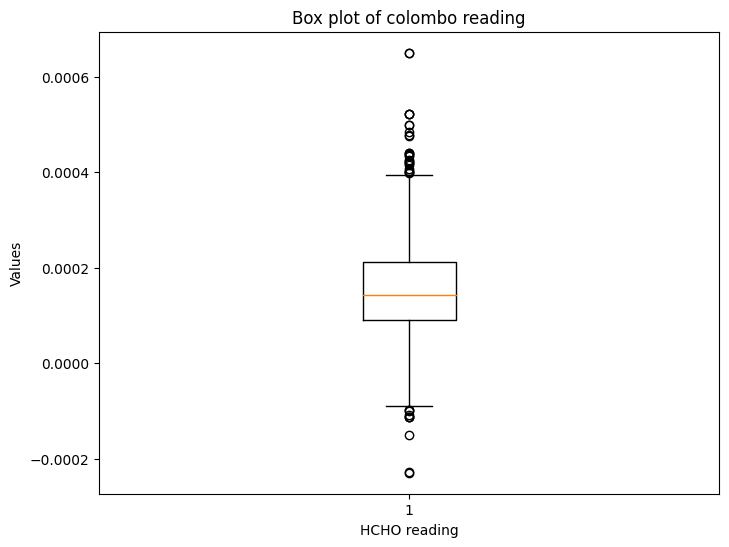

In [133]:
#Box plot data HCHO values in Colombo data frame 
plt.figure(figsize=(8, 6))
plt.boxplot(colombo_df['HCHO reading'])
plt.title('Box plot of colombo reading')
plt.xlabel('HCHO reading')
plt.ylabel('Values')
plt.show()

In [134]:
# Upper Bound and lower bound of the Dataset
# Calculate Q1, Q3, and IQR
Q1 = colombo_df['HCHO reading'].quantile(0.25)
Q3 = colombo_df['HCHO reading'].quantile(0.75)
IQR = Q3 - Q1

# Compute upper whisker and lower whisker value
upper_whisker = Q3 + 1.5 * IQR
lower_whisker = Q1 - 1.5 * IQR
# Find the highest data point within the upper whisker range
upper_bound_data = colombo_df['HCHO reading'][colombo_df['HCHO reading'] <= upper_whisker].max()
# Find the lowest data point within the lower whisker range
lower_bound_data = colombo_df['HCHO reading'][colombo_df['HCHO reading'] >= lower_whisker].min()

print("Upper bound within the boxplot:", upper_bound_data)
print("Lower bound within the boxplot:", lower_bound_data)

Upper bound within the boxplot: 0.0003934967004419
Lower bound within the boxplot: -8.888445964777543e-05


In [135]:
upper_count_colombo = colombo_df[colombo_df['HCHO reading'] > upper_bound_data]['HCHO reading'].count()
lower_count_colombo = colombo_df[colombo_df['HCHO reading'] < lower_bound_data]['HCHO reading'].count()
print("Number of values greater than upper bound data in colombo_df:", upper_count_colombo)
print("Number of values lower than lower bound data in colombo_df:", lower_count_colombo)

Number of values greater than upper bound data in colombo_df: 26
Number of values lower than lower bound data in colombo_df: 10


In [136]:
colombo_df = colombo_df.drop(colombo_df[(colombo_df['HCHO reading'] >= upper_bound_data)].index)
colombo_df= colombo_df.drop(colombo_df[(colombo_df["HCHO reading"] <= lower_bound_data)].index)

In [137]:
# Apply winsorization to the remaining outliers
colombo_df['HCHO reading'] = np.where(colombo_df['HCHO reading'] > upper_bound_data, upper_whisker, colombo_df['HCHO reading'])
colombo_df['HCHO reading'] = np.where(colombo_df['HCHO reading'] < lower_bound_data, lower_whisker, colombo_df['HCHO reading'])

# Check if there are any outliers remaining after winsorization
remaining_outliers = colombo_df[(colombo_df['HCHO reading'] > upper_whisker) | (colombo_df['HCHO reading'] < lower_whisker)]

if not remaining_outliers.empty:
    print("There are still outliers remaining after winsorization.")
else:
    print("All outliers have been successfully winsorized.")

All outliers have been successfully winsorized.


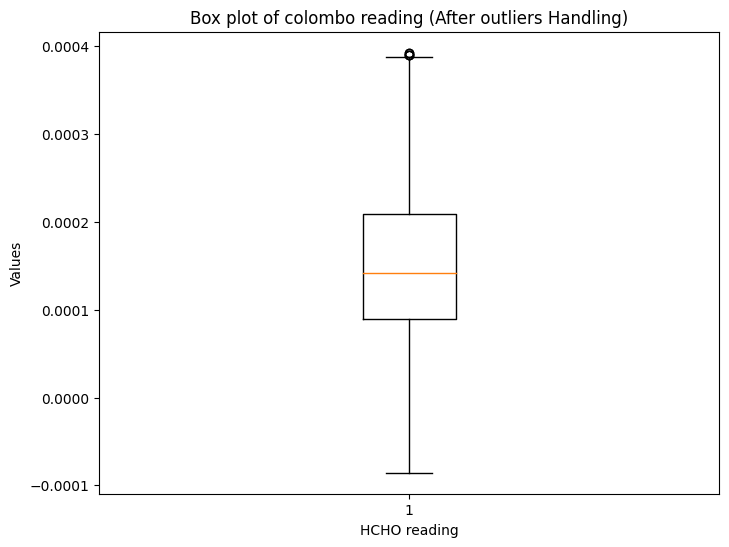

In [138]:
#Box plot data HCHO values in Colombo data frame 
plt.figure(figsize=(8, 6))
plt.boxplot(colombo_df['HCHO reading'])
plt.title('Box plot of colombo reading (After outliers Handling)')
plt.xlabel('HCHO reading')
plt.ylabel('Values')
plt.show()

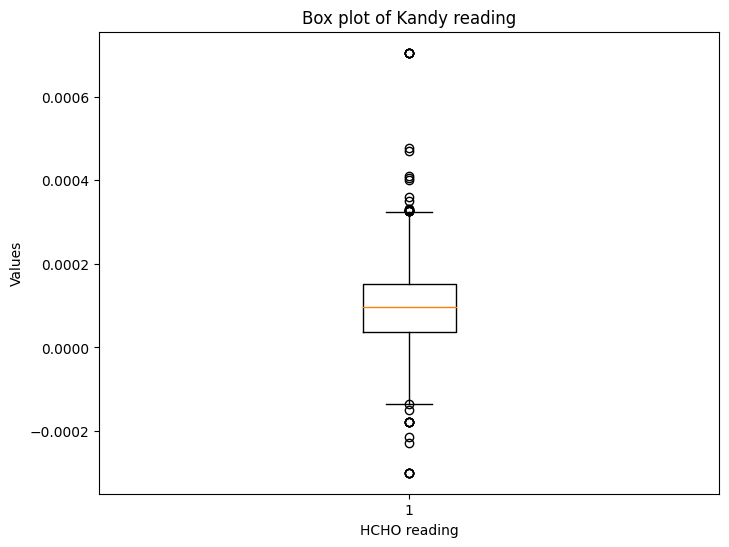

In [139]:
#Box plot kandy dataframe HCHO values 
plt.figure(figsize=(8, 6))
plt.boxplot(kandy_df['HCHO reading'])
plt.title('Box plot of Kandy reading')
plt.xlabel('HCHO reading')
plt.ylabel('Values')
plt.show()

In [140]:
# Upper Bound and lower bound of the Dataset
# Calculate Q1, Q3, and IQR
Q1 = kandy_df['HCHO reading'].quantile(0.25)
Q3 = kandy_df['HCHO reading'].quantile(0.75)
IQR = Q3 - Q1

# Compute upper whisker and lower whisker value
upper_whisker = Q3 + 1.5 * IQR
lower_whisker = Q1 - 1.5 * IQR
# Find the highest data point within the upper whisker range
upper_bound_data = kandy_df['HCHO reading'][kandy_df['HCHO reading'] <= upper_whisker].max()
# Find the lowest data point within the lower whisker range
lower_bound_data = kandy_df['HCHO reading'][kandy_df['HCHO reading'] >= lower_whisker].min()

print("Upper bound within the boxplot:", upper_bound_data)
print("Lower bound within the boxplot:", lower_bound_data)

Upper bound within the boxplot: 0.0003232150559895
Lower bound within the boxplot: -0.0001341463357675


In [141]:
upper_count_kandy = kandy_df[kandy_df['HCHO reading'] > upper_bound_data]['HCHO reading'].count()
lower_count_kandy = kandy_df[kandy_df['HCHO reading'] < lower_bound_data]['HCHO reading'].count()
print("Number of values greater than upper bound data in kandy_df:", upper_count_kandy)
print("Number of values lower than lower bound data in kandy_df:", lower_count_kandy)

Number of values greater than upper bound data in kandy_df: 23
Number of values lower than lower bound data in kandy_df: 15


In [142]:
kandy_df = kandy_df.drop(kandy_df[(kandy_df['HCHO reading'] >= upper_bound_data)].index)
kandy_df= kandy_df.drop(kandy_df[(kandy_df["HCHO reading"] <= lower_bound_data)].index)

In [143]:
# Apply winsorization to the remaining outliers
kandy_df['HCHO reading'] = np.where(kandy_df['HCHO reading'] > upper_bound_data, upper_whisker, kandy_df['HCHO reading'])
kandy_df['HCHO reading'] = np.where(kandy_df['HCHO reading'] < lower_bound_data, lower_whisker, kandy_df['HCHO reading'])

# Check if there are any outliers remaining after winsorization
remaining_outliers = kandy_df[(kandy_df['HCHO reading'] > upper_whisker) | (kandy_df['HCHO reading'] < lower_whisker)]

if not remaining_outliers.empty:
    print("There are still outliers remaining after winsorization.")
else:
    print("All outliers have been successfully winsorized.")

All outliers have been successfully winsorized.


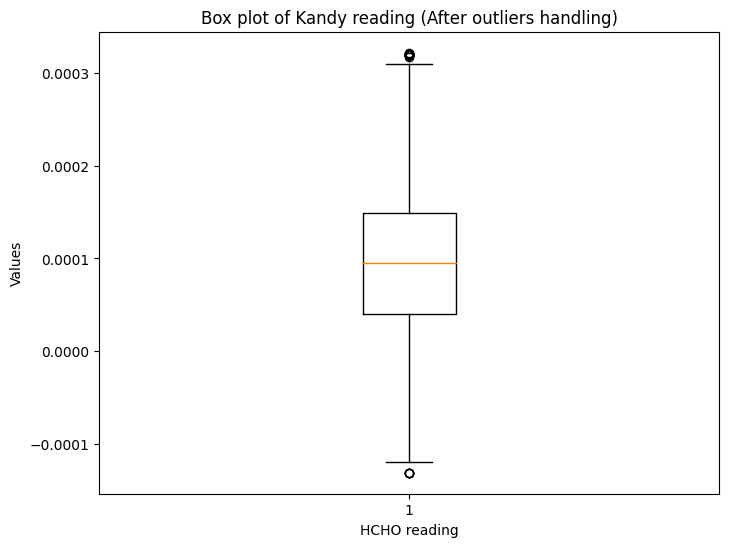

In [144]:
#Box plot kandy dataframe HCHO values 
plt.figure(figsize=(8, 6))
plt.boxplot(kandy_df['HCHO reading'])
plt.title('Box plot of Kandy reading (After outliers handling)')
plt.xlabel('HCHO reading')
plt.ylabel('Values')
plt.show()

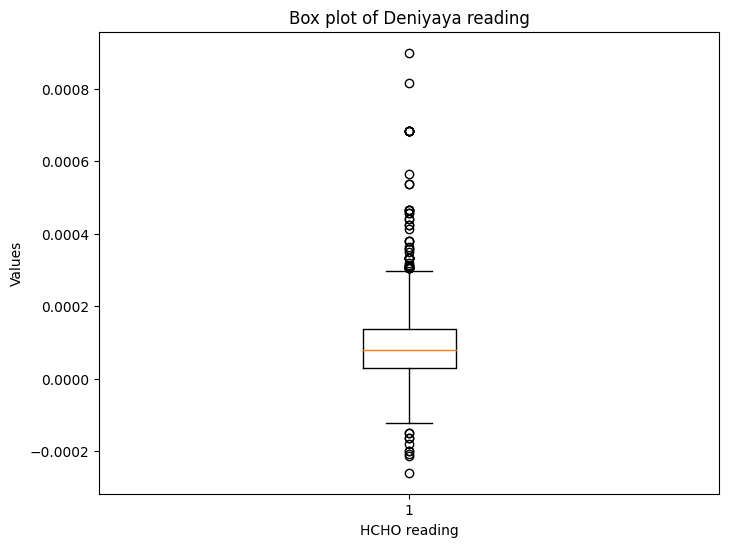

In [145]:
#Box plot HCHO values in Deniyaya dataframe
plt.figure(figsize=(8, 6))
plt.boxplot(deniyaya_df['HCHO reading'])
plt.title('Box plot of Deniyaya reading')
plt.xlabel('HCHO reading')
plt.ylabel('Values')
plt.show()

In [146]:
# Upper Bound and lower bound of the Dataset
# Calculate Q1, Q3, and IQR
Q1 = deniyaya_df['HCHO reading'].quantile(0.25)
Q3 = deniyaya_df['HCHO reading'].quantile(0.75)
IQR = Q3 - Q1

# Compute upper whisker and lower whisker value
upper_whisker = Q3 + 1.5 * IQR
lower_whisker = Q1 - 1.5 * IQR
# Find the highest data point within the upper whisker range
upper_bound_data = deniyaya_df['HCHO reading'][deniyaya_df['HCHO reading'] <= upper_whisker].max()
lower_bound_data = deniyaya_df["HCHO reading"][deniyaya_df["HCHO reading"] >= lower_whisker].min()

print("Upper bound within the boxplot:", upper_bound_data)
print("Lower bound within the boxplot:", lower_bound_data)

Upper bound within the boxplot: 0.0002964527594232
Lower bound within the boxplot: -0.0001226669264724


In [147]:
upper_count = deniyaya_df[deniyaya_df['HCHO reading'] > upper_bound_data]['HCHO reading'].count()
lower_count = deniyaya_df[deniyaya_df['HCHO reading'] < lower_bound_data]['HCHO reading'].count()
print("Number of values greater than upper bound data:", upper_count)
print("Number of values lower than upper bound data:", lower_count)

Number of values greater than upper bound data: 50
Number of values lower than upper bound data: 10


In [148]:
deniyaya_df = deniyaya_df.drop(deniyaya_df[(deniyaya_df['HCHO reading'] >= upper_bound_data)].index)
deniyaya_df= deniyaya_df.drop(deniyaya_df[(deniyaya_df["HCHO reading"] <= lower_bound_data)].index)

In [149]:
# Apply winsorization to the remaining outliers
deniyaya_df['HCHO reading'] = np.where(deniyaya_df['HCHO reading'] > upper_bound_data, upper_whisker, deniyaya_df['HCHO reading'])
deniyaya_df['HCHO reading'] = np.where(deniyaya_df['HCHO reading'] < lower_bound_data, lower_whisker, deniyaya_df['HCHO reading'])

# Check if there are any outliers remaining after winsorization
remaining_outliers = deniyaya_df[(deniyaya_df['HCHO reading'] > upper_whisker) | (deniyaya_df['HCHO reading'] < lower_whisker)]

if not remaining_outliers.empty:
    print("There are still outliers remaining after winsorization.")
else:
    print("All outliers have been successfully winsorized.")

All outliers have been successfully winsorized.


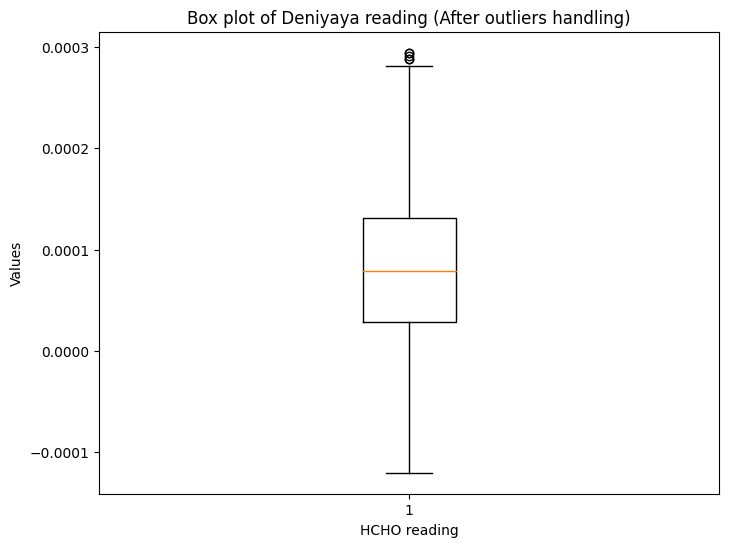

In [150]:
#Box plot HCHO values in Deniyaya dataframe
plt.figure(figsize=(8, 6))
plt.boxplot(deniyaya_df['HCHO reading'])
plt.title('Box plot of Deniyaya reading (After outliers handling)')
plt.xlabel('HCHO reading')
plt.ylabel('Values')
plt.show()

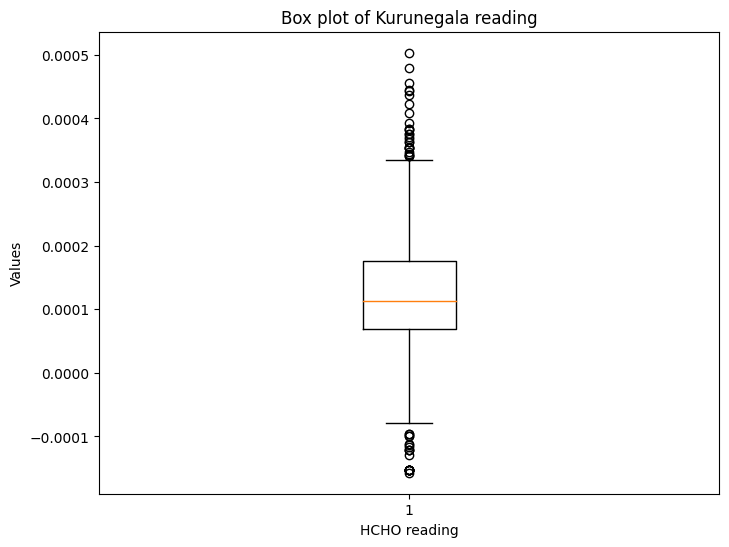

In [151]:
#Box plot HCHO values in Kurunegala dataframe
plt.figure(figsize=(8, 6))
plt.boxplot(kurunegala_df['HCHO reading'])
plt.title('Box plot of Kurunegala reading')
plt.xlabel('HCHO reading')
plt.ylabel('Values')
plt.show()

In [152]:
# Upper Bound and lower bound of the Dataset
# Calculate Q1, Q3, and IQR
Q1 = kurunegala_df['HCHO reading'].quantile(0.25)
Q3 = kurunegala_df['HCHO reading'].quantile(0.75)
IQR = Q3 - Q1

# Compute upper whisker and lower whisker value
upper_whisker = Q3 + 1.5 * IQR
lower_whisker = Q1 - 1.5 * IQR
# Find the highest data point within the upper whisker range
upper_bound_data = kurunegala_df['HCHO reading'][kurunegala_df['HCHO reading'] <= upper_whisker].max()
lower_bound_data = kurunegala_df["HCHO reading"][kurunegala_df["HCHO reading"] >= lower_whisker].min()

print("Upper bound within the boxplot:", upper_bound_data)
print("Lower bound within the boxplot:", lower_bound_data)

Upper bound within the boxplot: 0.0003348459427343
Lower bound within the boxplot: -7.817408913979307e-05


In [153]:
upper_count_kurunegala = kurunegala_df[kurunegala_df['HCHO reading'] > upper_bound_data]['HCHO reading'].count()
lower_count_kurunegala = kurunegala_df[kurunegala_df['HCHO reading'] < lower_bound_data]['HCHO reading'].count()
print("Number of values greater than upper bound data in kurunegala_df:", upper_count_kurunegala)
print("Number of values lower than lower bound data in kurunegala_df:", lower_count_kurunegala)

Number of values greater than upper bound data in kurunegala_df: 27
Number of values lower than lower bound data in kurunegala_df: 21


In [154]:
kurunegala_df = kurunegala_df.drop(kurunegala_df[(kurunegala_df["HCHO reading"] >= upper_bound_data)].index)
kurunegala_df = kurunegala_df.drop(kurunegala_df[(kurunegala_df["HCHO reading"] <= lower_bound_data)].index)

In [155]:
# Apply winsorization to the remaining outliers
kurunegala_df['HCHO reading'] = np.where(kurunegala_df['HCHO reading'] > upper_bound_data, upper_whisker, kurunegala_df['HCHO reading'])
kurunegala_df['HCHO reading'] = np.where(kurunegala_df['HCHO reading'] < lower_bound_data, lower_whisker, kurunegala_df['HCHO reading'])

# Check if there are any outliers remaining after winsorization
remaining_outliers = kurunegala_df[(kurunegala_df['HCHO reading'] > upper_whisker) | (kurunegala_df['HCHO reading'] < lower_whisker)]

if not remaining_outliers.empty:
    print("There are still outliers remaining after winsorization.")
else:
    print("All outliers have been successfully winsorized.")

All outliers have been successfully winsorized.


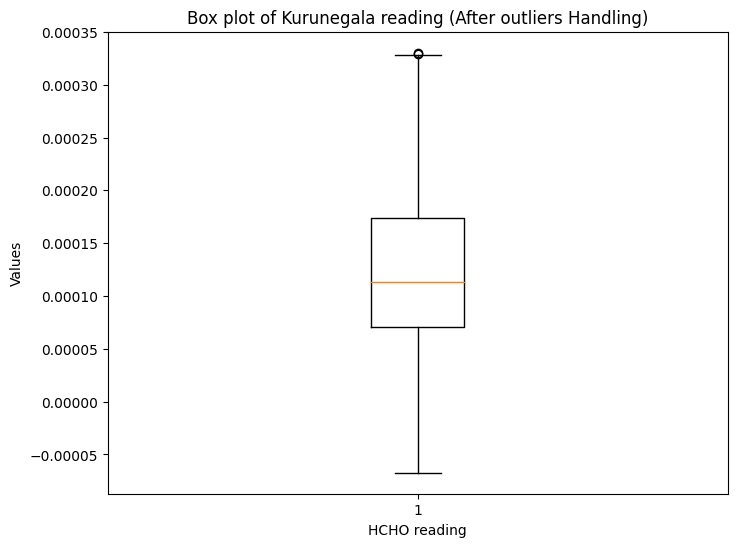

In [156]:
#Box plot HCHO values in Kurunegala dataframe
plt.figure(figsize=(8, 6))
plt.boxplot(kurunegala_df['HCHO reading'])
plt.title('Box plot of Kurunegala reading (After outliers Handling)')
plt.xlabel('HCHO reading')
plt.ylabel('Values')
plt.show()

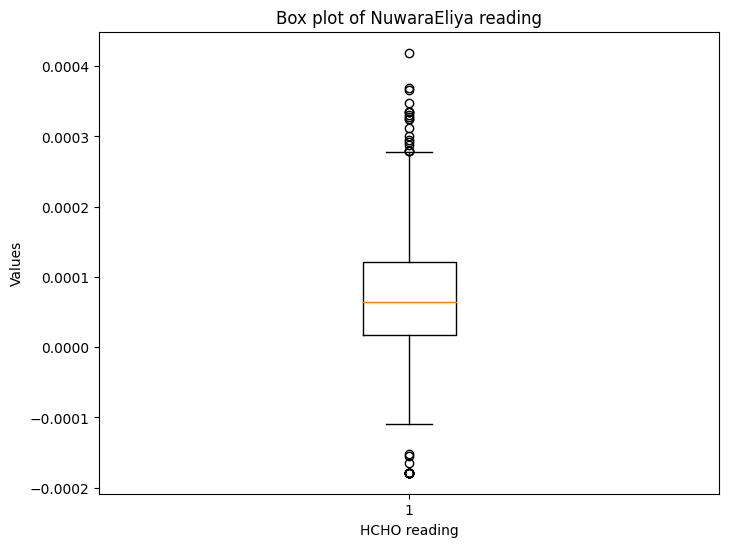

In [157]:
#Box plot HCHO values in the Nuwara eliya Dataframe
plt.figure(figsize=(8, 6))
plt.boxplot(nuwaraEliya_df['HCHO reading'])
plt.title('Box plot of NuwaraEliya reading')
plt.xlabel('HCHO reading')
plt.ylabel('Values')
plt.show()

In [158]:
# Upper Bound and lower bound of the Dataset
# Calculate Q1, Q3, and IQR
Q1 = nuwaraEliya_df['HCHO reading'].quantile(0.25)
Q3 = nuwaraEliya_df['HCHO reading'].quantile(0.75)
IQR = Q3 - Q1

# Compute upper whisker and lower whisker value
upper_whisker = Q3 + 1.5 * IQR
lower_whisker = Q1 - 1.5 * IQR
# Find the highest data point within the upper whisker range
upper_bound_data = nuwaraEliya_df['HCHO reading'][nuwaraEliya_df['HCHO reading'] <= upper_whisker].max()
lower_bound_data = nuwaraEliya_df["HCHO reading"][nuwaraEliya_df["HCHO reading"]>= lower_whisker].min()

print("Upper bound within the boxplot:", upper_bound_data)
print("Lower bound within the boxplot:", lower_bound_data)

Upper bound within the boxplot: 0.0002771661984116
Lower bound within the boxplot: -0.0001089299252098


In [159]:
nuwaraEliya_df = nuwaraEliya_df.drop(nuwaraEliya_df[(nuwaraEliya_df['HCHO reading'] >= upper_bound_data)].index)
nuwaraEliya_df = nuwaraEliya_df.drop(nuwaraEliya_df[(nuwaraEliya_df['HCHO reading'] <= lower_bound_data)].index)

In [160]:
# Apply winsorization to the remaining outliers
nuwaraEliya_df['HCHO reading'] = np.where(nuwaraEliya_df['HCHO reading'] > upper_bound_data, upper_whisker, nuwaraEliya_df['HCHO reading'])
nuwaraEliya_df['HCHO reading'] = np.where(nuwaraEliya_df['HCHO reading'] < lower_bound_data, lower_whisker, nuwaraEliya_df['HCHO reading'])

# Check if there are any outliers remaining after winsorization
remaining_outliers = nuwaraEliya_df[(nuwaraEliya_df['HCHO reading'] > upper_whisker) | (nuwaraEliya_df['HCHO reading'] < lower_whisker)]

if not remaining_outliers.empty:
    print("There are still outliers remaining after winsorization.")
else:
    print("All outliers have been successfully winsorized.")

All outliers have been successfully winsorized.


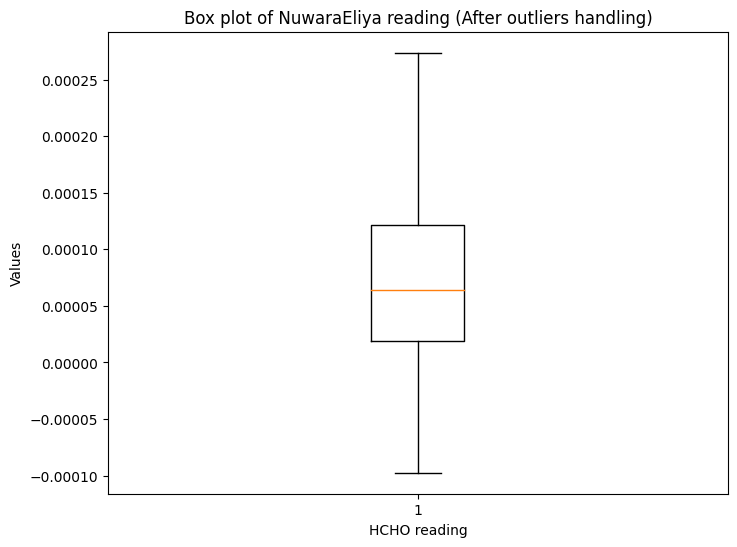

In [161]:
#Box plot HCHO values in the Nuwara eliya Dataframe
plt.figure(figsize=(8, 6))
plt.boxplot(nuwaraEliya_df['HCHO reading'])
plt.title('Box plot of NuwaraEliya reading (After outliers handling)')
plt.xlabel('HCHO reading')
plt.ylabel('Values')
plt.show()

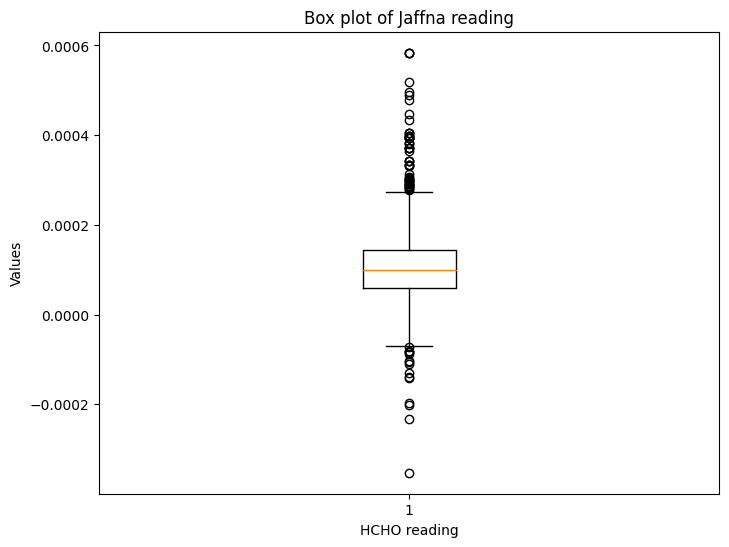

In [162]:
#Box plot HCHO reading values in Jaffna Dataframe
plt.figure(figsize=(8, 6))
plt.boxplot(jaffna_df['HCHO reading'])
plt.title('Box plot of Jaffna reading')
plt.xlabel('HCHO reading')
plt.ylabel('Values')
plt.show()

In [163]:
# Upper Bound and lower bound of the Dataset
# Calculate Q1, Q3, and IQR
Q1 = jaffna_df['HCHO reading'].quantile(0.25)
Q3 = jaffna_df['HCHO reading'].quantile(0.75)
IQR = Q3 - Q1

# Compute upper whisker and lower whisker value
upper_whisker = Q3 + 1.5 * IQR
lower_whisker = Q1 - 1.5 * IQR
# Find the highest data point within the upper whisker range
upper_bound_data = jaffna_df['HCHO reading'][jaffna_df['HCHO reading'] <= upper_whisker].max()
# Find the lowest data point within the lower whisker range
lower_bound_data = jaffna_df['HCHO reading'][jaffna_df['HCHO reading'] >= lower_whisker].min()

print("Upper bound within the boxplot:", upper_bound_data)
print("Lower bound within the boxplot:", lower_bound_data)

Upper bound within the boxplot: 0.0002729933174109
Lower bound within the boxplot: -6.91114370543075e-05


In [164]:
upper_count_jaffna = jaffna_df[jaffna_df['HCHO reading'] > upper_bound_data]['HCHO reading'].count()
lower_count_jaffna = jaffna_df[jaffna_df['HCHO reading'] < lower_bound_data]['HCHO reading'].count()
print("Number of values greater than upper bound data in jaffna_df:", upper_count_jaffna)
print("Number of values lower than lower bound data in jaffna_df:", lower_count_jaffna)

Number of values greater than upper bound data in jaffna_df: 55
Number of values lower than lower bound data in jaffna_df: 15


In [165]:
jaffna_df = jaffna_df.drop(jaffna_df[(jaffna_df['HCHO reading'] >= upper_bound_data)].index)
jaffna_df = jaffna_df.drop(jaffna_df[(jaffna_df['HCHO reading'] <= lower_bound_data)].index)

In [166]:
# Apply winsorization to the remaining outliers
jaffna_df['HCHO reading'] = np.where(jaffna_df['HCHO reading'] > upper_bound_data, upper_whisker, jaffna_df['HCHO reading'])
jaffna_df['HCHO reading'] = np.where(jaffna_df['HCHO reading'] < lower_bound_data, lower_whisker, jaffna_df['HCHO reading'])

# Check if there are any outliers remaining after winsorization
remaining_outliers = jaffna_df[(jaffna_df['HCHO reading'] > upper_whisker) | (jaffna_df['HCHO reading'] < lower_whisker)]

if not remaining_outliers.empty:
    print("There are still outliers remaining after winsorization.")
else:
    print("All outliers have been successfully winsorized.")

All outliers have been successfully winsorized.


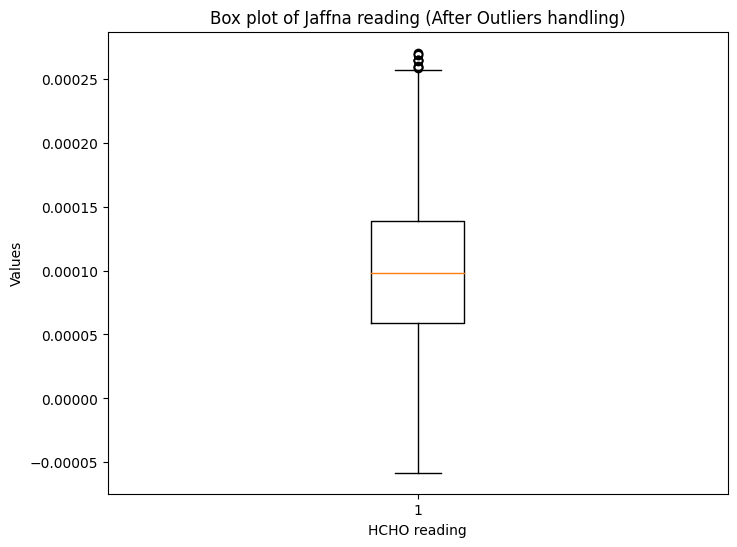

In [167]:
#Box plot HCHO reading vlaues in Jaffna Data frame 
plt.figure(figsize=(8, 6))
plt.boxplot(jaffna_df['HCHO reading'])
plt.title('Box plot of Jaffna reading (After Outliers handling)')
plt.xlabel('HCHO reading')
plt.ylabel('Values')
plt.show()

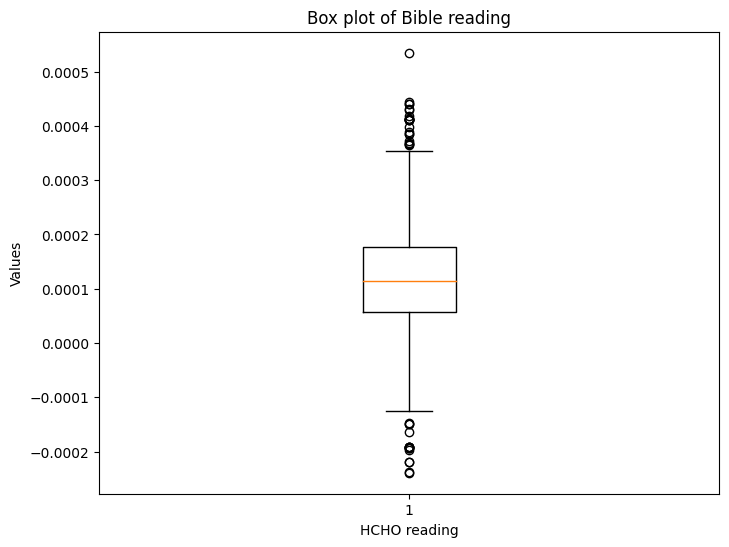

In [168]:
#Box plot HCHO reading values in bibile dataframe
plt.figure(figsize=(8, 6))
plt.boxplot(bibile_df['HCHO reading'])
plt.title('Box plot of Bible reading')
plt.xlabel('HCHO reading')
plt.ylabel('Values')
plt.show()

In [169]:
# Upper Bound and lower bound of the Dataset
# Calculate Q1, Q3, and IQR
Q1 = bibile_df['HCHO reading'].quantile(0.25)
Q3 = bibile_df['HCHO reading'].quantile(0.75)
IQR = Q3 - Q1

# Compute upper whisker and lower whisker value
upper_whisker = Q3 + 1.5 * IQR
lower_whisker = Q1 - 1.5 * IQR
# Find the highest data point within the upper whisker range
upper_bound_data = bibile_df['HCHO reading'][bibile_df['HCHO reading'] <= upper_whisker].max()
# Find the lowest data point within the lower whisker range
lower_bound_data = bibile_df['HCHO reading'][bibile_df['HCHO reading'] >= lower_whisker].min()

print("Upper bound within the boxplot:", upper_bound_data)
print("Lower bound within the boxplot:", lower_bound_data)

Upper bound within the boxplot: 0.000354432924956
Lower bound within the boxplot: -0.0001246291509994


In [170]:
upper_count_bibile = bibile_df[bibile_df['HCHO reading'] > upper_bound_data]['HCHO reading'].count()
lower_count_bibile = bibile_df[bibile_df['HCHO reading'] < lower_bound_data]['HCHO reading'].count()
print("Number of values greater than upper bound data in bibile_df:", upper_count_bibile)
print("Number of values lower than lower bound data in bibile_df:", lower_count_bibile)

Number of values greater than upper bound data in bibile_df: 23
Number of values lower than lower bound data in bibile_df: 16


In [171]:
bibile_df = bibile_df.drop(bibile_df[(bibile_df['HCHO reading'] >= upper_bound_data)].index)
bibile_df = bibile_df.drop(bibile_df[(bibile_df['HCHO reading'] <= lower_bound_data)].index)

In [172]:
# Apply winsorization to the remaining outliers
bibile_df['HCHO reading'] = np.where(bibile_df['HCHO reading'] > upper_bound_data, upper_whisker, bibile_df['HCHO reading'])
bibile_df['HCHO reading'] = np.where(bibile_df['HCHO reading'] < lower_bound_data, lower_whisker, bibile_df['HCHO reading'])

# Check if there are any outliers remaining after winsorization
remaining_outliers = bibile_df[(bibile_df['HCHO reading'] > upper_whisker) | (bibile_df['HCHO reading'] < lower_whisker)]

if not remaining_outliers.empty:
    print("There are still outliers remaining after winsorization.")
else:
    print("All outliers have been successfully winsorized.")

All outliers have been successfully winsorized.


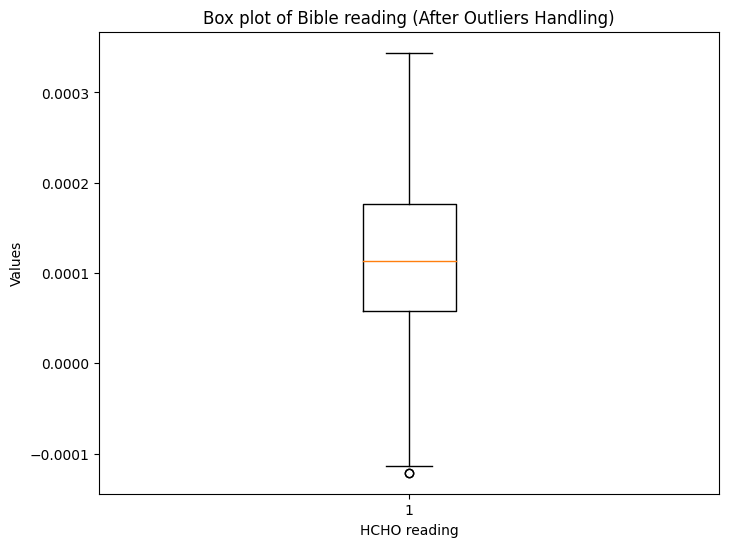

In [173]:
#Box plot HCHO reading values in bibile dataframe
plt.figure(figsize=(8, 6))
plt.boxplot(bibile_df['HCHO reading'])
plt.title('Box plot of Bible reading (After Outliers Handling)')
plt.xlabel('HCHO reading')
plt.ylabel('Values')
plt.show()

### Covert Dataframes into Stationary

In [174]:
from statsmodels.tsa.stattools import adfuller

In [175]:
result = adfuller(colombo_df['HCHO reading'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))
if result[1] <= 0.05:
    print("The dataframe is stationary")

ADF Statistic: -3.672389
p-value: 0.004519
	1%: -3.434
	5%: -2.863
	10%: -2.568
The dataframe is stationary


In [176]:
result = adfuller(kandy_df['HCHO reading'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))
if result[1] <= 0.05:
    print("The dataframe is stationary")

ADF Statistic: -15.255191
p-value: 0.000000
	1%: -3.434
	5%: -2.863
	10%: -2.568
The dataframe is stationary


In [177]:
result = adfuller(bibile_df['HCHO reading'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))
print (result[1])
if result[1] <= 0.05:
    print("The dataframe is stationary")

ADF Statistic: -5.884802
p-value: 0.000000
	1%: -3.434
	5%: -2.863
	10%: -2.568
3.0191693729003726e-07
The dataframe is stationary


In [178]:
result = adfuller(kurunegala_df['HCHO reading'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))
print (result[1])
if result[1] <= 0.05:
    print("the The dataframe is stationary")
    

ADF Statistic: -8.230063
p-value: 0.000000
	1%: -3.434
	5%: -2.863
	10%: -2.568
6.096959688449554e-13
the The dataframe is stationary


In [179]:
result = adfuller(jaffna_df['HCHO reading'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))
print (result[1])
if result[1] <= 0.05:
    print("The dataframe is stationary")

ADF Statistic: -6.803297
p-value: 0.000000
	1%: -3.434
	5%: -2.863
	10%: -2.568
2.2089226206230444e-09
The dataframe is stationary


In [180]:
result = adfuller(nuwaraEliya_df['HCHO reading'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))
print (result[1])
if result[1] <= 0.05:
    print("The dataframe is stationary")

ADF Statistic: -8.594701
p-value: 0.000000
	1%: -3.434
	5%: -2.863
	10%: -2.568
7.12947193632331e-14
The dataframe is stationary


In [181]:
result = adfuller(deniyaya_df['HCHO reading'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))
print (result[1])
if result[1] <= 0.05:
    print("The dataframe is stationary")

ADF Statistic: -12.521109
p-value: 0.000000
	1%: -3.434
	5%: -2.863
	10%: -2.568
2.547267255315699e-23
The dataframe is stationary


### Save Pre-Processed Data

In [182]:
colombo_df.to_csv("DataSets/ColomboData.csv")
kandy_df.to_csv("DataSets/KandyData.csv")
nuwaraEliya_df.to_csv("DataSets/NuwaraEliyData.csv")
bibile_df.to_csv("DataSets/BibileData.csv")
kurunegala_df.to_csv("DataSets/KurunegalaData.csv")
jaffna_df.to_csv("DataSets/JaffnaData.csv")
deniyaya_df.to_csv("DataSets/DeniyayaData.csv")